<a href="https://colab.research.google.com/github/namozhdehi/KSR/blob/main/NYC_Taxi_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

# **Import libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Reading Files into Python**

In [28]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [29]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [30]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [31]:
df.shape

(729322, 11)

In [32]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# **Variable Identification and Typecasting**

In [33]:
df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


# **Integer Data Type**

In [34]:
df.dtypes[df.dtypes == 'int64']

,0
vendor_id,int64
passenger_count,int64
trip_duration,int64


**Summary:**
- **vendor_id** are a unique number assigned to customers therefore it is **Ok to be integer**.
- **passenger_count** shows the number of passanger in each trips and it's **OK to be integer.**
- **trip_duration** indicates length of each trip so it's **OK to be integer.**

# **Float Data Type**

In [35]:
df.dtypes[df.dtypes == 'float64']

,0
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64


**Summary:**
- **pickup_longitude** is expected to be a float number so it **should not be changed.**
- **pickup_latitude** is expected to be a float number therefore **we do not need to change it.**
- **dropoff_longitude** is expected to be a float number so it **should not be changed.**
- **dropoff_latitude** is expected to be a float number therefore **we do not need to change it.**

In [36]:
df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


*    **variables like 'pickup_datetime'** and **'dropoff_datetime' has  object type**. This means that **Pandas was not able to recognize the datatype** of these three variables.

In [37]:
df[['pickup_datetime',  'dropoff_datetime' , 'store_and_fwd_flag' ]].head()

,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,2016-02-17 06:42:23,2016-02-17 06:56:31,N


In [38]:
df['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,725282
Y,4040


- **'pickup_datetime' and 'dropoff_datetime'** should be a datetime variable.


In [39]:
# Convert date field to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [40]:
# last day of year
df['doy_pickup_datetime'] = df['pickup_datetime'].dt.dayofyear
df['doy_dropoff_datetime'] = df['dropoff_datetime'].dt.dayofyear

# week of year
df['woy_pickup_datetime'] = df['pickup_datetime'].dt.isocalendar
df['woy_dropoff_datetime'] = df['dropoff_datetime'].dt.isocalendar

# month of year
df['moy_pickup_datetime'] = df['pickup_datetime'].dt.month
df['moy_dropoff_datetime'] = df['dropoff_datetime'].dt.month

# day of week
df['dow_pickup_datetime'] = df['pickup_datetime'].dt.dayofweek
df['dow_dropoff_datetime'] = df['dropoff_datetime'].dt.dayofweek

In [41]:
df['hour_pickup_datetime'] = df['pickup_datetime'].dt.hour
df['hour_dropoff_datetime'] = df['dropoff_datetime'].dt.hour

df['minute_pickup_datetime'] = df['pickup_datetime'].dt.minute
df['minute_dropoff_datetime'] = df['dropoff_datetime'].dt.minute

df['second_pickup_datetime'] = df['pickup_datetime'].dt.second
df['second_dropoff_datetime'] = df['dropoff_datetime'].dt.second

In [42]:
# checking new extracted columns using datetime
df[['pickup_datetime','doy_pickup_datetime','woy_pickup_datetime','moy_pickup_datetime','dow_pickup_datetime', 'hour_pickup_datetime', 'minute_pickup_datetime', 'second_pickup_datetime']].head()

,pickup_datetime,doy_pickup_datetime,woy_pickup_datetime,moy_pickup_datetime,dow_pickup_datetime,hour_pickup_datetime,minute_pickup_datetime,second_pickup_datetime
0,2016-02-29 16:40:21,60,<bound method DatetimeProperties.isocalendar o...,2,0,16,40,21
1,2016-03-11 23:35:37,71,<bound method DatetimeProperties.isocalendar o...,3,4,23,35,37
2,2016-02-21 17:59:33,52,<bound method DatetimeProperties.isocalendar o...,2,6,17,59,33
3,2016-01-05 09:44:31,5,<bound method DatetimeProperties.isocalendar o...,1,1,9,44,31
4,2016-02-17 06:42:23,48,<bound method DatetimeProperties.isocalendar o...,2,2,6,42,23


In [43]:
df[['dropoff_datetime', 'doy_dropoff_datetime','woy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime', 'hour_pickup_datetime', 'minute_dropoff_datetime', 'second_dropoff_datetime']].head()

,dropoff_datetime,doy_dropoff_datetime,woy_dropoff_datetime,moy_dropoff_datetime,dow_dropoff_datetime,hour_pickup_datetime,minute_dropoff_datetime,second_dropoff_datetime
0,2016-02-29 16:47:01,60,<bound method DatetimeProperties.isocalendar o...,2,0,16,47,1
1,2016-03-11 23:53:57,71,<bound method DatetimeProperties.isocalendar o...,3,4,23,53,57
2,2016-02-21 18:26:48,52,<bound method DatetimeProperties.isocalendar o...,2,6,17,26,48
3,2016-01-05 10:03:32,5,<bound method DatetimeProperties.isocalendar o...,1,1,9,3,32
4,2016-02-17 06:56:31,48,<bound method DatetimeProperties.isocalendar o...,2,2,6,56,31


In [44]:
df[['hour_pickup_datetime', 'minute_pickup_datetime', 'second_pickup_datetime', 'hour_pickup_datetime', 'minute_dropoff_datetime', 'second_dropoff_datetime', 'trip_duration']].head()

,hour_pickup_datetime,minute_pickup_datetime,second_pickup_datetime,hour_pickup_datetime,minute_dropoff_datetime,second_dropoff_datetime,trip_duration
0,16,40,21,16,47,1,400
1,23,35,37,23,53,57,1100
2,17,59,33,17,26,48,1635
3,9,44,31,9,3,32,1141
4,6,42,23,6,56,31,848


In [49]:
# Numerical datatypes
df.select_dtypes(include=['int64', 'int32','float64','Int64']).dtypes

,0
vendor_id,int64
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
trip_duration,int64
doy_pickup_datetime,int32
doy_dropoff_datetime,int32
moy_pickup_datetime,int32


In [50]:
# seggregating variables into groups
ride_details = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'trip_duration']
pickuptime = ['pickup_datetime', 'doy_pickup_datetime', 'woy_pickup_datetime', 'moy_pickup_datetime', 'dow_pickup_datetime', 'hour_pickup_datetime', 'minute_pickup_datetime', 'second_pickup_datetime']
dropofftime = ['dropoff_datetime', 'doy_dropoff_datetime','woy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime', 'hour_pickup_datetime', 'minute_dropoff_datetime', 'second_dropoff_datetime']
coordinates = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [51]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

# **Rides Details**

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

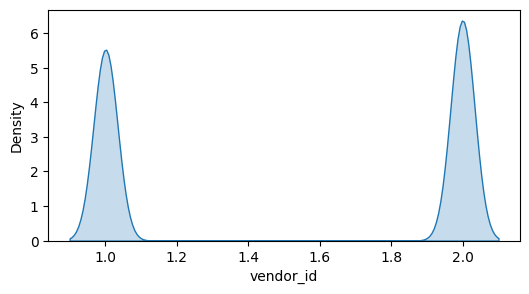

In [52]:
UVA_numeric(df,ride_details)